# Lab 1

Name: **Elmer Canales**

Date: **March 1, 2025**

# Part 1: The Gravitational Potential of the Earth
___

In [1]:
# Importing all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy.integrate import quad

In [2]:
# Defining the gravitational function
# The function takes 5 inputs, the mass of the main body and 2 xy coordinates
def gravitational_potential(M, xm, ym, x, y):
    G = 6.67e-11
    # Using np.isclose() to return np.nan to prevent the function from exploding or dividing by zero
    if np.isclose(xm, x) and np.isclose(ym, y):
        G_potential = np.nan
    else:
        r = np.sqrt((xm - x)**2 + (ym - y)**2)
        G_potential = - (G * M) / r
    return G_potential

# Vectorizing the function
Gravitational_Potential = np.vectorize(gravitational_potential)

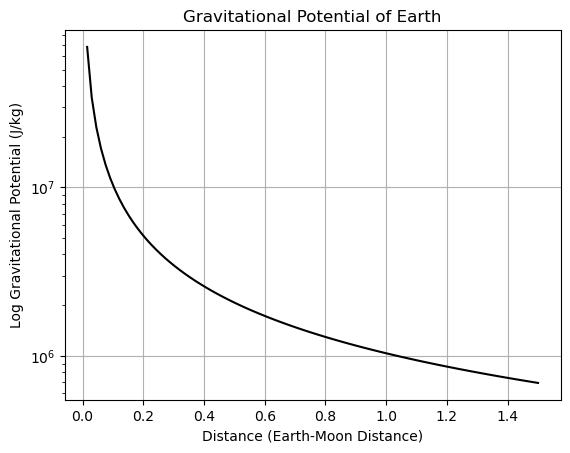

In [3]:
# distance between Earth and the Moon
distance_Earth_Moon = 3.8e8  # Meters

# Initializing distance variables to calculate the gravitational potential
xm = np.linspace(0, 1.5, 100)         # Distance between Earth and the Moon
# Converting to meters for units consistency
xm_meters = xm * distance_Earth_Moon  # Meters
ym = 0

# Position of the Earth for the scenario
x_earth = 0
y_earth = 0
# Calculating the gravtional potential based on those distances
GP = Gravitational_Potential(5.9e24, x_earth, y_earth, xm_meters, ym)

# Plotting the gravitational position at various x
fig, ax_gp = plt.subplots(1, 1)
ax_gp.plot(xm, np.abs(GP), color = 'black')
# Labeling the plot
ax_gp.set_xlabel("Distance (Earth-Moon Distance)")
ax_gp.set_ylabel("Log Gravitational Potential (J/kg)")
ax_gp.set_title("Gravitational Potential of Earth")
# Setting the y-scale to log to better display the plot
ax_gp.set_yscale("log")
ax_gp.grid()

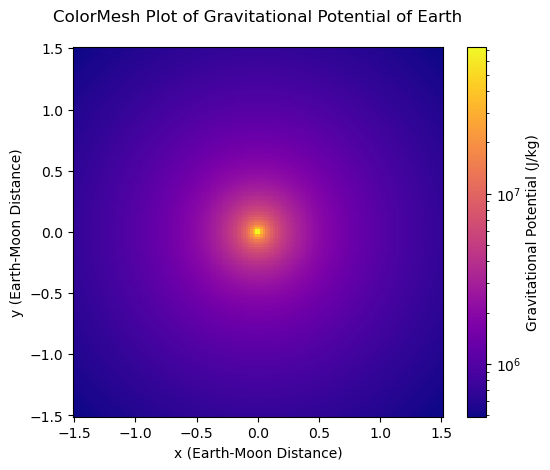

In [4]:
# Initializing xy variables to calculate the gravitational potential, along with converting them to meters
xm = np.linspace(-1.5, 1.5, 150)         # Distance between Earth and the Moon
xm_meters = xm * distance_Earth_Moon     # Meters
ym = np.linspace(-1.5, 1.5, 150)         # Distance between Earth and the Moon
ym_meters = ym * distance_Earth_Moon     # Meters

# Turning both xy variables to meshgrid
grid_xm_meters, grid_ym_meters = np.meshgrid(xm_meters, ym_meters)
grid_xm, grid_ym = np.meshgrid(xm, ym)
GP = Gravitational_Potential(5.9e24, 0, 0, grid_xm_meters, grid_ym_meters)

# Plotting a colormesh plot of the gravitational potential
fig, ax_gp_cm = plt.subplots(1, 1)
add_color = ax_gp_cm.pcolormesh(grid_xm, grid_ym, np.abs(GP), cmap = cm.plasma, norm = colors.LogNorm(vmin = np.abs(GP).min(), vmax = np.abs(GP).max()))
# Labeling the plot and other setting to make the plot look 'nice'
ax_gp_cm.set_xlabel('x (Earth-Moon Distance)')
ax_gp_cm.set_xlabel('x (Earth-Moon Distance)')
ax_gp_cm.set_ylabel("y (Earth-Moon Distance)")
ax_gp_cm.set_title("ColorMesh Plot of Gravitational Potential of Earth\n")
ax_gp_cm.set_aspect("equal")

# Adding and labeling the colorbar to mesh plot
cbar = fig.colorbar(add_color)
cbar.set_label("Gravitational Potential (J/kg)")

# Part 2: The Gravitational Potential of the Earth-Moon System
___

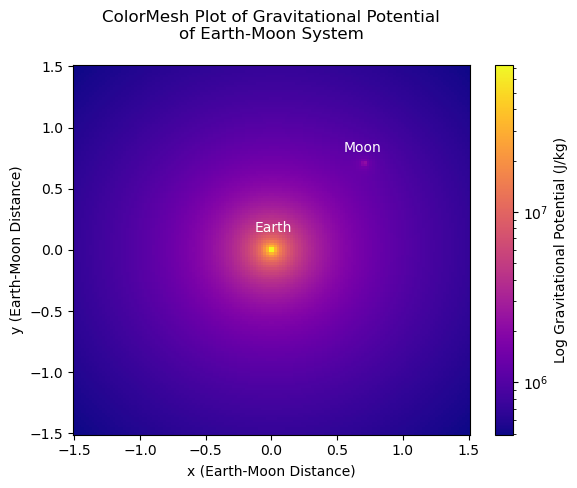

In [5]:
# Initializing all variables necessary to calculate the gravitational potential based on the Earth and Moon
# Earth variables
M_Earth = 5.9e24   #kg
x_Earth = 0
y_Earth = 0

# Moon variables
M_Moon = 7.3e22    # kg
x_Moon = (3.8e8) / np.sqrt(2)
y_Moon = (3.8e8) / np.sqrt(2)

# Initializing xy variables to calculate the gravitational potential from
xm = np.linspace(-1.5, 1.5, 150)         # Distance between Earth and the Moon
xm_meters = xm * distance_Earth_Moon     # Meters
ym = np.linspace(-1.5, 1.5, 150)         # Distance between Earth and the Moon
ym_meters = ym * distance_Earth_Moon     # Meters

grid_xm_meters, grid_ym_meters = np.meshgrid(xm_meters, ym_meters)
grid_xm, grid_ym = np.meshgrid(xm, ym)

# Calculating the gravitional potential of both the Earth and Moon and then adding them
GP_Earth = Gravitational_Potential(M_Earth, x_Earth, y_Earth, grid_xm_meters, grid_ym_meters)
GP_Moon = Gravitational_Potential(M_Moon, x_Moon, y_Moon, grid_xm_meters, grid_ym_meters)
GP_combine = np.abs(GP_Earth) + np.abs(GP_Moon)

# Plotting a color mesh plot of the gravitstional potential of the Earth-Moon system
fig, ax_gp_cm = plt.subplots(1, 1)
# using 'lognorm' to make the gravitational potential log scale
add_mesh_color = ax_gp_cm.pcolormesh(grid_xm, grid_ym, GP_combine, cmap = cm.plasma, norm = colors.LogNorm(vmin = GP_combine.min(), vmax = GP_combine.max()))
# Labeling the plot
ax_gp_cm.set_xlabel('x (Earth-Moon Distance)')
ax_gp_cm.set_ylabel("y (Earth-Moon Distance)")
ax_gp_cm.set_title("ColorMesh Plot of Gravitational Potential\nof Earth-Moon System\n")
ax_gp_cm.text(0.55, 0.8, "Moon", color = 'white')
ax_gp_cm.text(-0.13, 0.15, "Earth", color = 'white')

# Adding and labeling the colorbar
cbar = fig.colorbar(add_mesh_color)
cbar.set_label("Log Gravitational Potential (J/kg)")

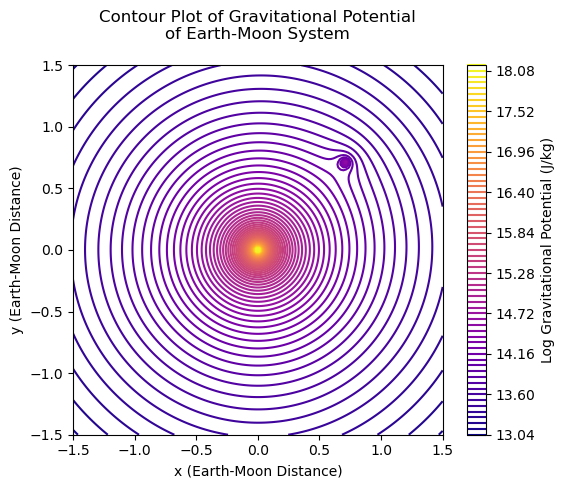

In [6]:
# Plotting a contour plot of the gravitational potential of the Earth-Moon system
fig_contour, ax_gp_contour = plt.subplots(1, 1)
add_contour_color = ax_gp_contour.contour(grid_xm, grid_ym, np.log(GP_combine), cmap = cm.plasma, levels = 70)
# Labeling the plot
ax_gp_contour.set_xlabel('x (Earth-Moon Distance)')
ax_gp_contour.set_ylabel("y (Earth-Moon Distance)")
ax_gp_contour.set_title("Contour Plot of Gravitational Potential\nof Earth-Moon System\n")
ax_gp_contour.set_aspect("equal")

# Addind and labeling the colorbar
cbar = fig.colorbar(add_contour_color)
cbar.set_label("Log Gravitational Potential (J/kg)")

# Part 3: The Gravitational Force Field of the Earth-Moon System
___

In [7]:
# Defining a function to take 6 inputs and calculate the gravitational force based on those inputs
def g_force(m1, m2, x1, y1, x2, y2):
    G = 6.67e-11
    M = m1 * m2
    # Using 'np.isclose()' to prevent the function from exploding and dividing by zero
    if np.isclose(x1, x2) and np.isclose(y1, y2):
        Fx = np.nan
        Fy = np.nan
        return Fx, Fy
    else:
        # Calculating the r-squared component
        r_squared = (np.sqrt((x1 - x2)**2 + (y1 - y2)**2))**2
        # Calculating vector and unit vector
        vector_r = np.array([x1 - x2, y1 - y2])
        vector_r_hat = vector_r / np.linalg.norm(vector_r)
        # Calculating the two gravitational force components
        Fx = - ((G * M) / r_squared) * vector_r_hat[0]
        Fy = - ((G * M) / r_squared) * vector_r_hat[1]
        
    return Fx, Fy
# Vectorizing the function
gravitational_force = np.vectorize(g_force)

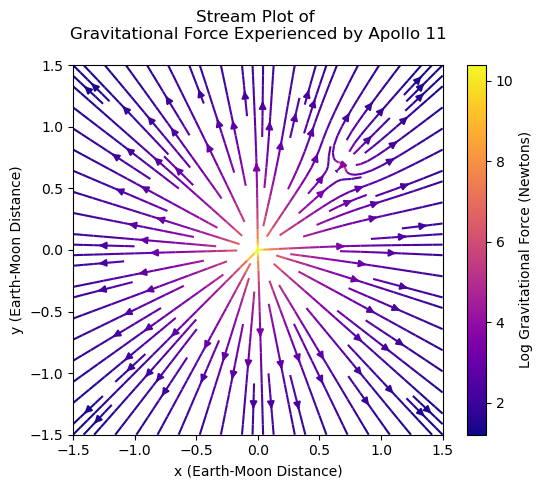

In [8]:
# Initializing mass variables
m_Earth = 5.9e24    # Mass of Earth
m_Moon = 7.3e22     # Mass of Moon
m_Apollo = 5500     # Mass of Apollo 11 Command Module

# Earth coordinate
x_Earth = 0
y_Earth = 0

# Moon coordinate
x_Moon = distance_Earth_Moon / np.sqrt(2)
y_Moon = distance_Earth_Moon / np.sqrt(2)

# Apollo 11 coordinates
x_Apollo = np.linspace(-1.5, 1.5, 100)               # Distance between Earth and the Moon
x_Apollo_meters = x_Apollo * distance_Earth_Moon     # Meters
y_Apollo = np.linspace(-1.5, 1.5, 100)               # Distance between Earth and the Moon
y_Apollo_meters = y_Apollo * distance_Earth_Moon     # Meters

# Transforming Apollo 11 coordinates to meshgrid
grid_x_Apollo_meters, grid_y_Apollo_meters = np.meshgrid(x_Apollo_meters, y_Apollo_meters)
grid_x_Apollo, grid_y_Apollo = np.meshgrid(x_Apollo, y_Apollo)

# Calculating the gravitational force and its components for both the Earth and Moon
GFx_Earth_Apollo, GFy_Earth_Apollo = (gravitational_force(m_Earth, m_Apollo, x_Earth, y_Earth, grid_x_Apollo_meters, grid_y_Apollo_meters))
GFx_Moon_Apollo, GFy_Moon_Apollo = (gravitational_force(m_Moon, m_Apollo, x_Moon, y_Moon, grid_x_Apollo_meters, grid_y_Apollo_meters))

# Combining them to get the total gravitational force for each component
GFx_total = GFx_Earth_Apollo + GFx_Moon_Apollo
GFy_total = GFy_Earth_Apollo + GFy_Moon_Apollo

# Calculating the log of the gravitational forces
stream_color = np.log(np.hypot(GFx_total, GFy_total))

# Plotting a streamline plot of the results of the calculations
fig, ax_gf_stream = plt.subplots(1, 1)
stream = ax_gf_stream.streamplot(grid_x_Apollo, grid_y_Apollo, GFx_total, GFy_total, color = stream_color, cmap = cm.plasma, density = 1.2)
# Labeling the plots
ax_gf_stream.set_xlabel('x (Earth-Moon Distance)')
ax_gf_stream.set_ylabel("y (Earth-Moon Distance)")
ax_gf_stream.set_title("Stream Plot of \nGravitational Force Experienced by Apollo 11\n")
ax_gf_stream.set_aspect("equal")

# Adding and labeling the colorbar
cbar = fig.colorbar(stream.lines)
cbar.set_label("Log Gravitational Force (Newtons)")

# Part 4: Altitude of the Saturn V Rocket
___

In [9]:
# Defining the function for the burn time of the rocket
def burn_time(m0, mf, m_dot):
    T = (m0 - mf) / m_dot
    return T

# Variables needed to calculate the burn time
m0 = 2.8e6    # kg
mf = 7.5e5    # kg
m_dot = 1.3e4 #kg/s
# Calculating and storing the burn time
T = burn_time(m0, mf, m_dot)

# Displaying the burn time of the Saturn V Rocket
print(f"The burn time of the Saturn V is {T:.2f} seconds.\n")

# Defining the function delta v
def delta_v(t):
    # Variable needed to calculate delta v
    ve = 2.4e3     # m/s
    m0 = 2.8e6     # kg
    m_dot = 1.3e4  # kg/s
    g = 9.81       # m^2/s
    mt = m0 - m_dot * t
    # Using an 'if' statement to return delta v as zero if there is no more fuel
    if mt <= 0:
        delta_vel = 0
    else:
        delta_vel = ve * np.log(m0 / mt) - g * t
    return delta_vel

# Vectorizing the function
delta_velocity = np.vectorize(delta_v)

# Using the 'quad' function to integrate the delta v function from 0 to the burn time
h, err = quad(delta_velocity, 0, T)
# Displaying the final altitude of the rocket
print(f"The final altitude of the Saturn V after burning all its fuel is {h:.2f} meters.")

The burn time of the Saturn V is 157.69 seconds.

The final altitude of the Saturn V after burning all its fuel is 74093.98 meters.
